   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
Testing:
     pregnant  insulin   bmi  age  glucose  bp  pedigree
285         7      135  26.0   51      136  74     0.647
101         1        0  26.1   22      151  60     0.179
581         6        0  25.0   27      109  60     0.206
352         3        0  34.4   46       61  82     0.243
726         1      180  36.1   25      116  78     0.496
Accuracy: 0.7532467532467533


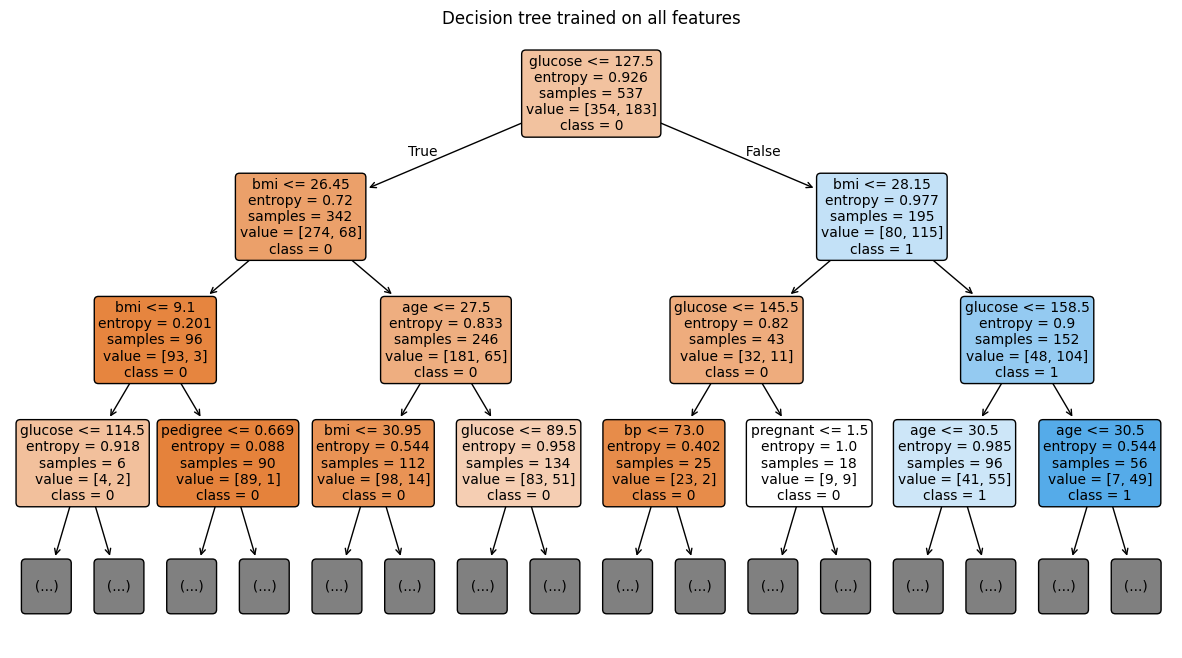

In [1]:
#If running in jupyter notebook you need to be able to use your virtual environment.
#First:
#pip install ipython
#ipython kernel install --user --name=aiinthewild
#This allows you use the virtual environment in jupyter notebook by selecting Kernel->Change Kernel

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

print(pima.head())

#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
#print(X_train)
#print(X_test)

# Create Decision Tree classifer object using information gain as the splitting criteria.
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
#Lets print out the first few rows of the test data.
print("Testing:")
print(X_test.head())
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#If using a jupyter notebook
#from sklearn.tree import export_graphviz
#import graphviz

#data = export_graphviz(clf, out_file=None,  
#                filled=True, rounded=True,
#                special_characters=True,
#                max_depth=3, 
#                feature_names = feature_cols,class_names=['0','1'])
#graph = graphviz.Source(data, format='png')
#graph

#Otherwise in normal python you can use matplotlib (you will need to pip install it):
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,8))
tree.plot_tree(clf, filled=True, rounded=True, max_depth=3, fontsize=10, feature_names=feature_cols,class_names=['0','1'])
plt.title("Decision tree trained on all features")
plt.show()